<a href="https://colab.research.google.com/github/BrunoAG77/plasticwaste-analysis/blob/main/plasticwaste_reciclamack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

In [ ]:
df = pd.read_csv("plasticwaste.csv")

In [ ]:
df[df['Recycling_Rate'] == df['Recycling_Rate'].max()] #País com o maior índice de reciclagem

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium


In [ ]:
df[df['Recycling_Rate'] == df['Recycling_Rate'].min()] #País com o menor índice de reciclagem

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
91,Somalia,0.33,Consumer_Packaging,0.1,20.4,High
124,Chad,0.09,Consumer_Packaging,0.1,5.4,Low


In [ ]:
df['Coastal_Waste_Risk'].value_counts() #Classificações de risco costal nos países

,count
Coastal_Waste_Risk,
High,74
Low,54
Medium,33
Very_High,4


In [ ]:
df[df['Coastal_Waste_Risk'] == "Very_High"] #Quais países possuem risco costal muito alto?

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
16,Vietnam,2.54,Food_Packaging,15.3,25.8,Very_High
25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High
149,Maldives,0.04,Consumer_Packaging,3.2,72.8,Very_High


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, hamming_loss, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
df['Coastal_Risk_Label'] = LabelEncoder().fit_transform(df['Coastal_Waste_Risk'])

In [ ]:
x = df[['Recycling_Rate','Per_Capita_Waste_KG','Total_Plastic_Waste_MT']]
y = df['Coastal_Risk_Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth = 3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
dt_pred = dt_model.predict(x_test)

[Text(0.5769230769230769, 0.875, 'Recycling_Rate <= 29.95\ngini = 0.64\nsamples = 132\nvalue = [62, 43, 24, 3]\nclass = High'),
 Text(0.3076923076923077, 0.625, 'Total_Plastic_Waste_MT <= 0.2\ngini = 0.592\nsamples = 109\nvalue = [62, 26, 18, 3]\nclass = High'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'Recycling_Rate <= 0.25\ngini = 0.386\nsamples = 40\nvalue = [30, 9, 0, 1]\nclass = High'),
 Text(0.07692307692307693, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3, 0, 0]\nclass = Low'),
 Text(0.23076923076923078, 0.125, 'gini = 0.323\nsamples = 36\nvalue = [29, 6, 0, 1]\nclass = High'),
 Text(0.46153846153846156, 0.375, 'Total_Plastic_Waste_MT <= 0.5\ngini = 0.655\nsamples = 69\nvalue = [32, 17, 18, 2]\nclass = High'),
 Text(0.38461538461538464, 0.125, 'gini = 0.642\nsamples = 26\nvalue = [7, 12, 7, 0]\nclass = Low'),
 Text(0.5384615384615384, 0.125, 'gini = 0.581\nsamples = 43\nvalue = [25, 5, 11, 2]\nclass = High'),
 Text(0.8461538461538461, 0.6

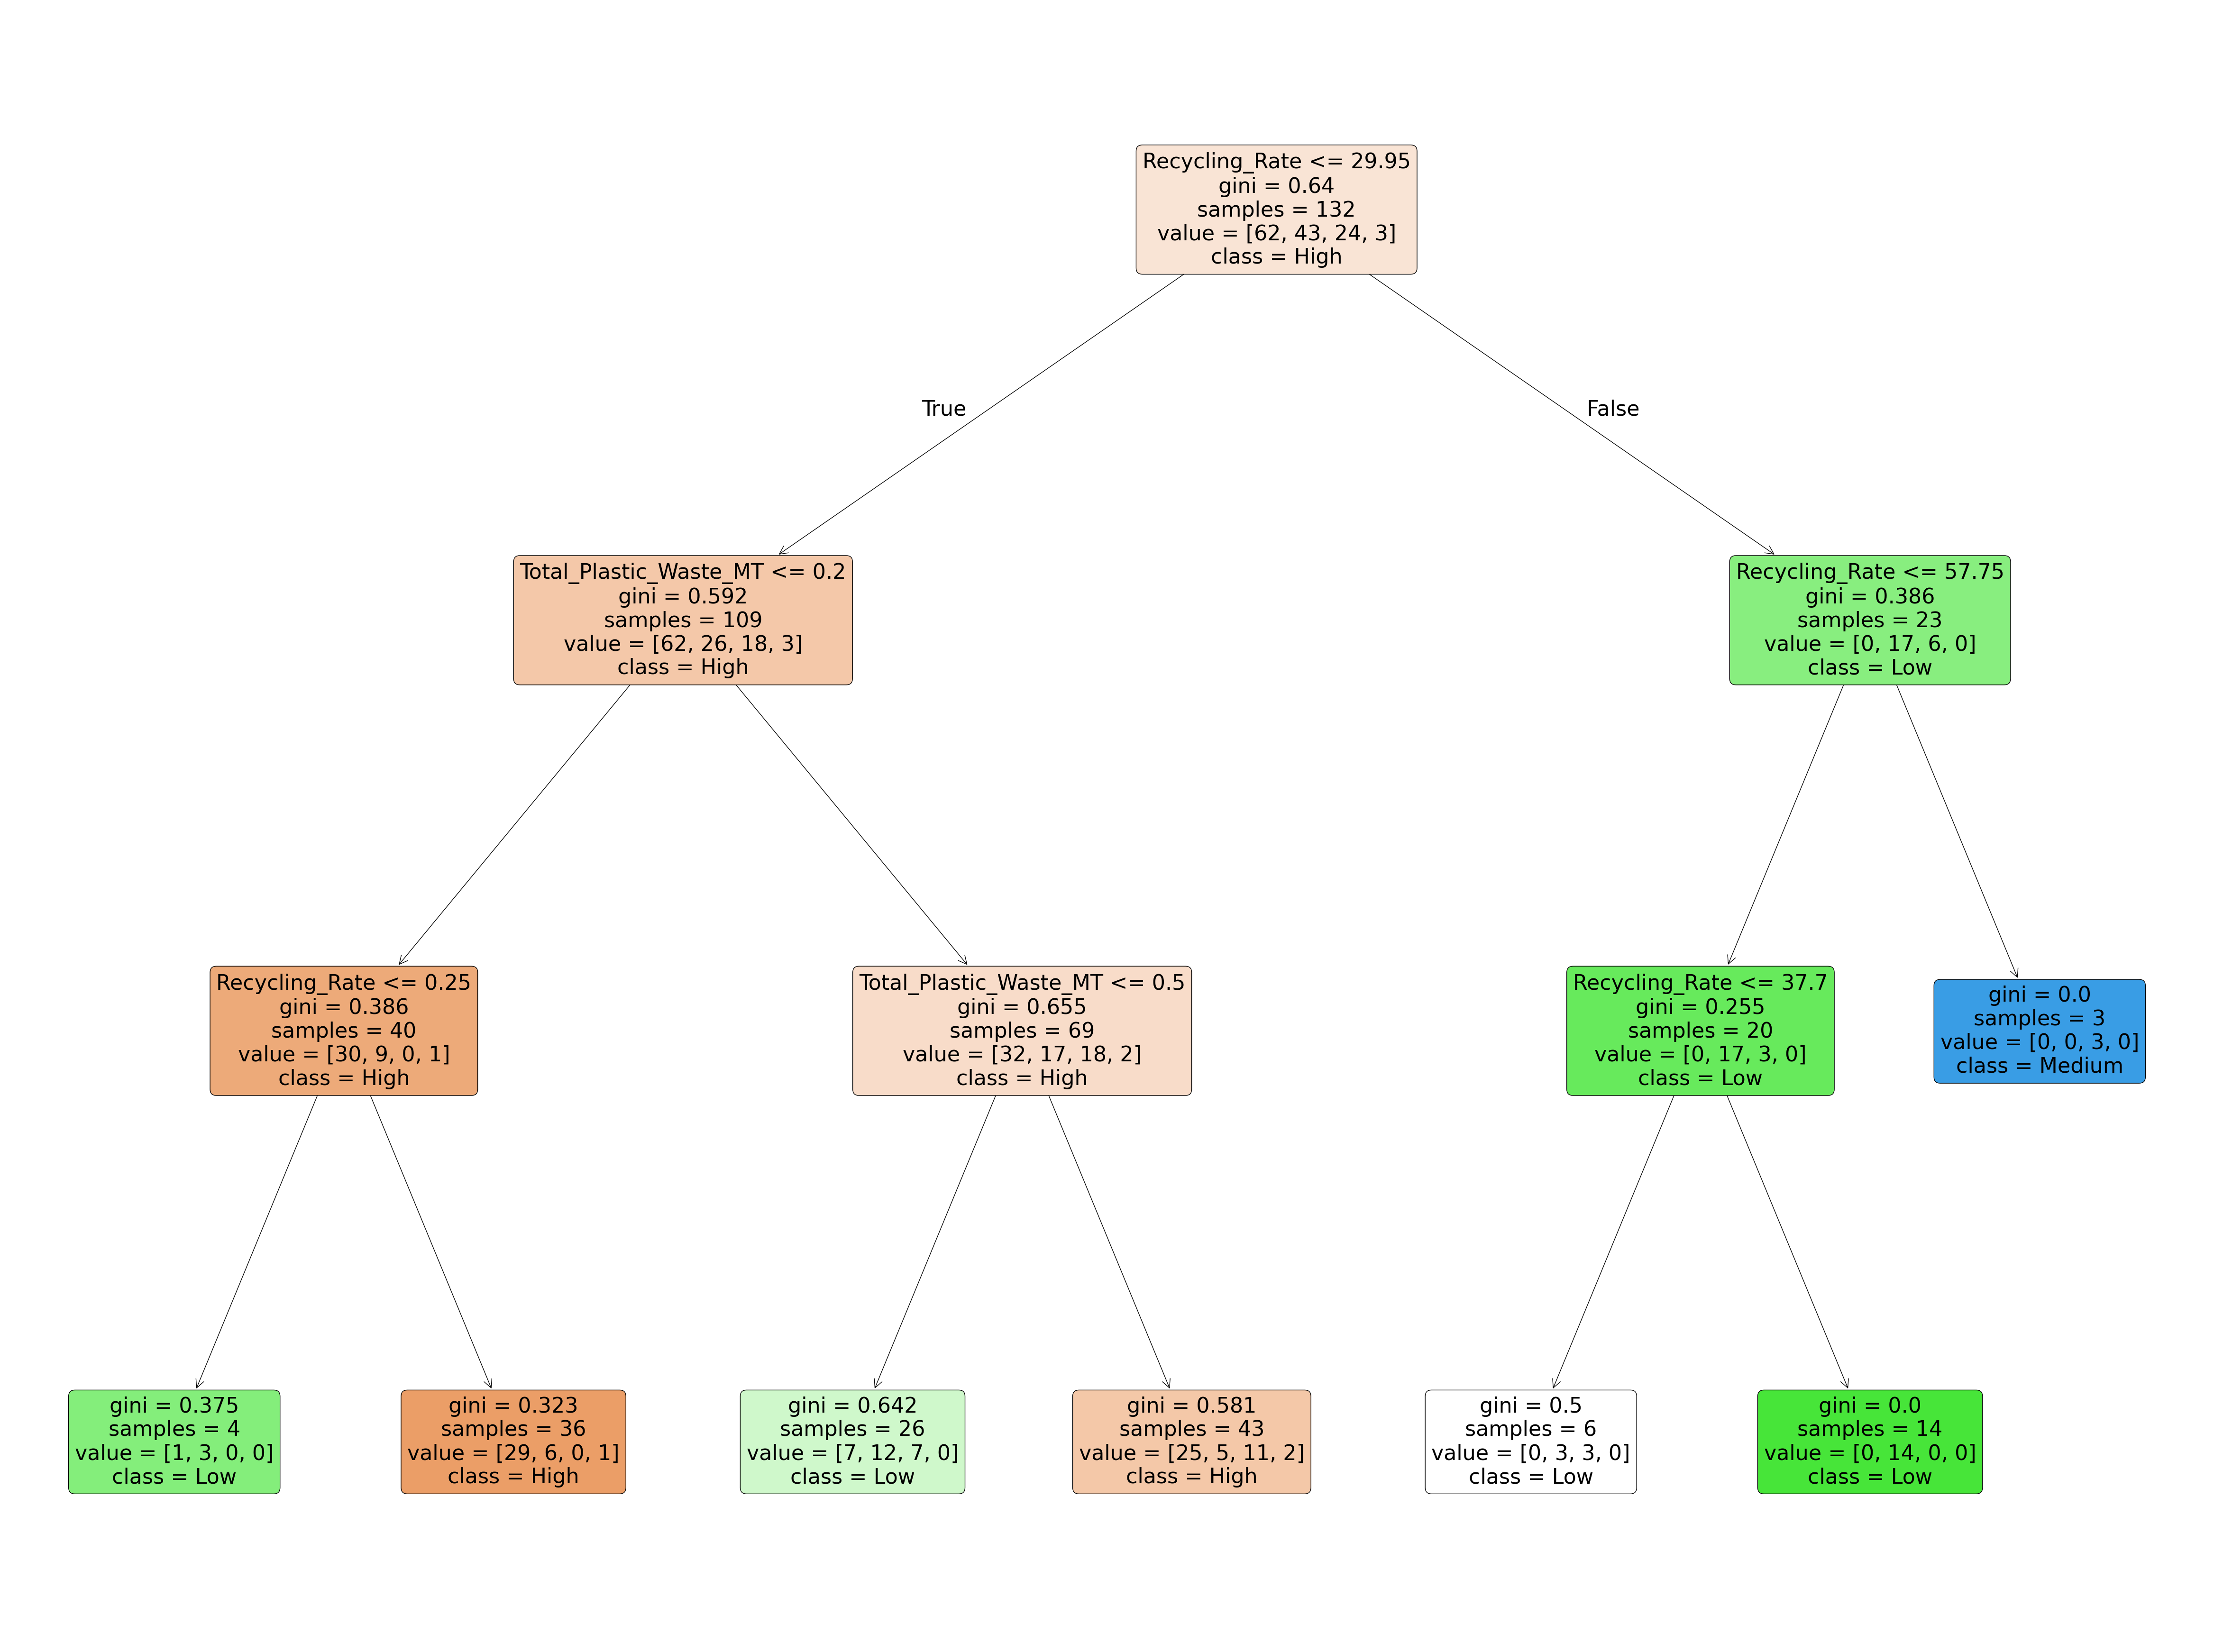

In [ ]:
plt.figure(figsize=(60,45))
tree.plot_tree(dt_model,
          filled=True,
          rounded=True,
          feature_names=['Recycling_Rate','Per_Capita_Waste_KG','Total_Plastic_Waste_MT'],
          class_names=encoder.classes_)

In [ ]:
report_tree = classification_report(y_test, dt_pred)
print(report_tree)

              precision    recall  f1-score   support

           0       0.52      0.92      0.67        12
           1       0.58      0.64      0.61        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         1

    accuracy                           0.55        33
   macro avg       0.28      0.39      0.32        33
weighted avg       0.38      0.55      0.45        33



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving plasticwaste.csv to plasticwaste (1).csv
         Country  Total_Plastic_Waste_MT           Main_Sources  \
0          China                   59.08   Packaging_Industrial   
1  United States                   42.02     Packaging_Consumer   
2          India                   26.33         Consumer_Goods   
3          Japan                    7.99  Packaging_Electronics   
4        Germany                    6.28   Automotive_Packaging   

   Recycling_Rate  Per_Capita_Waste_KG Coastal_Waste_Risk  
0            29.8                 41.2               High  
1            32.1                127.5             Medium  
2            11.5                 19.3               High  
3            84.8                 63.2             Medium  
4            56.1                 75.6                Low  


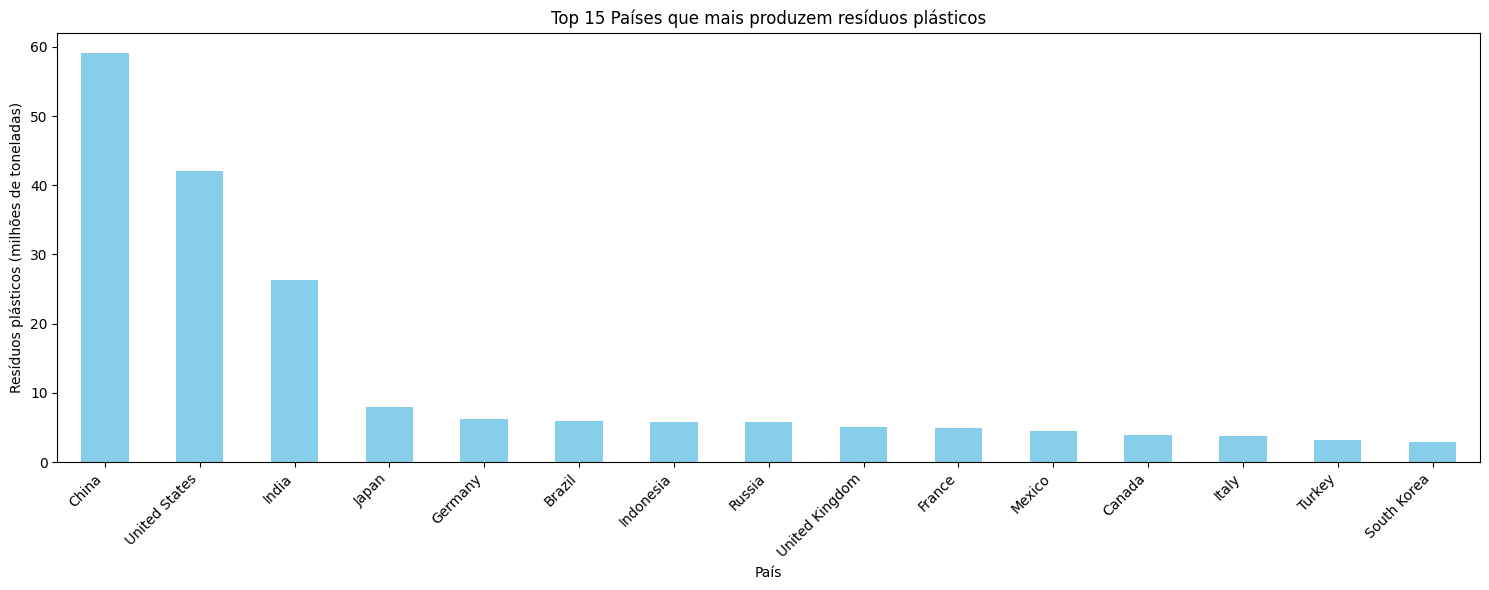

In [ ]:
from google.colab import files
uploaded = files.upload()

#Agrupa os dados por país e soma a quantidade total de plástico
Qnt_Total_Pais = df.groupby("Country")["Total_Plastic_Waste_MT"].sum()

# Seleciona os 15 países com maior produção
top10 = Qnt_Total_Pais.sort_values(ascending=False).head(15)

# Criando o gráfico de barras:
plt.figure(figsize=(15, 6))
top10.plot(kind="bar", color="skyblue")
plt.title("Top 15 Países que mais produzem resíduos plásticos")
plt.xlabel("País")
plt.ylabel("Resíduos plásticos (milhões de toneladas)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

# Conta as ocorrências de cada "Main_Sources" no conjunto de dados
source_counts = df['Main_Sources'].value_counts()

# Mostra o resultado
mais_comum = source_counts.idxmax()  # Fonte mais comum
quantidade = source_counts.max()  # Número de vezes que ela aparece

print(f"A fonte de residuos mais comum é '{mais_comum}' e aparece {quantidade} vezes.")


Saving plasticwaste.csv to plasticwaste (8).csv
A fonte de residuos mais comum é 'Consumer_Packaging' e aparece 131 vezes.


In [ ]:
from google.colab import files
uploaded = files.upload()

# Ordena os países pela taxa de reciclagem (decrescente para maiores taxas e crescente para menores)
maiores_taxas_reciclagem = df.sort_values(by='Recycling_Rate', ascending=False)
menores_taxas_reciclagem = df.sort_values(by='Recycling_Rate', ascending=True)

# Exibe os 5 países com maiores e menores taxas de reciclagem
print("Maiores taxas de reciclagem:")
print(maiores_taxas_reciclagem[['Country', 'Recycling_Rate', 'Per_Capita_Waste_KG']].head())

print("\nMenores taxas de reciclagem:")
print(menores_taxas_reciclagem[['Country', 'Recycling_Rate', 'Per_Capita_Waste_KG']].head())

# Analisa a correlação entre a taxa de reciclagem e resíduos per capita
correlacao = df[['Recycling_Rate', 'Per_Capita_Waste_KG']].corr()

print("\nCorrelação entre a taxa de reciclagem e os resíduos per capita:")
print(correlacao)


Saving plasticwaste.csv to plasticwaste (9).csv
Maiores taxas de reciclagem:
        Country  Recycling_Rate  Per_Capita_Waste_KG
3         Japan            84.8                 63.2
44    Singapore            59.8                217.9
14  South Korea            59.1                 56.7
33      Austria            56.4                164.8
4       Germany            56.1                 75.6

Menores taxas de reciclagem:
                      Country  Recycling_Rate  Per_Capita_Waste_KG
124                      Chad             0.1                  5.4
91                    Somalia             0.1                 20.4
116                   Liberia             0.2                  9.7
125  Central African Republic             0.2                  8.1
123                     Niger             0.2                  4.4

Correlação entre a taxa de reciclagem e os resíduos per capita:
                     Recycling_Rate  Per_Capita_Waste_KG
Recycling_Rate             1.000000             0.2

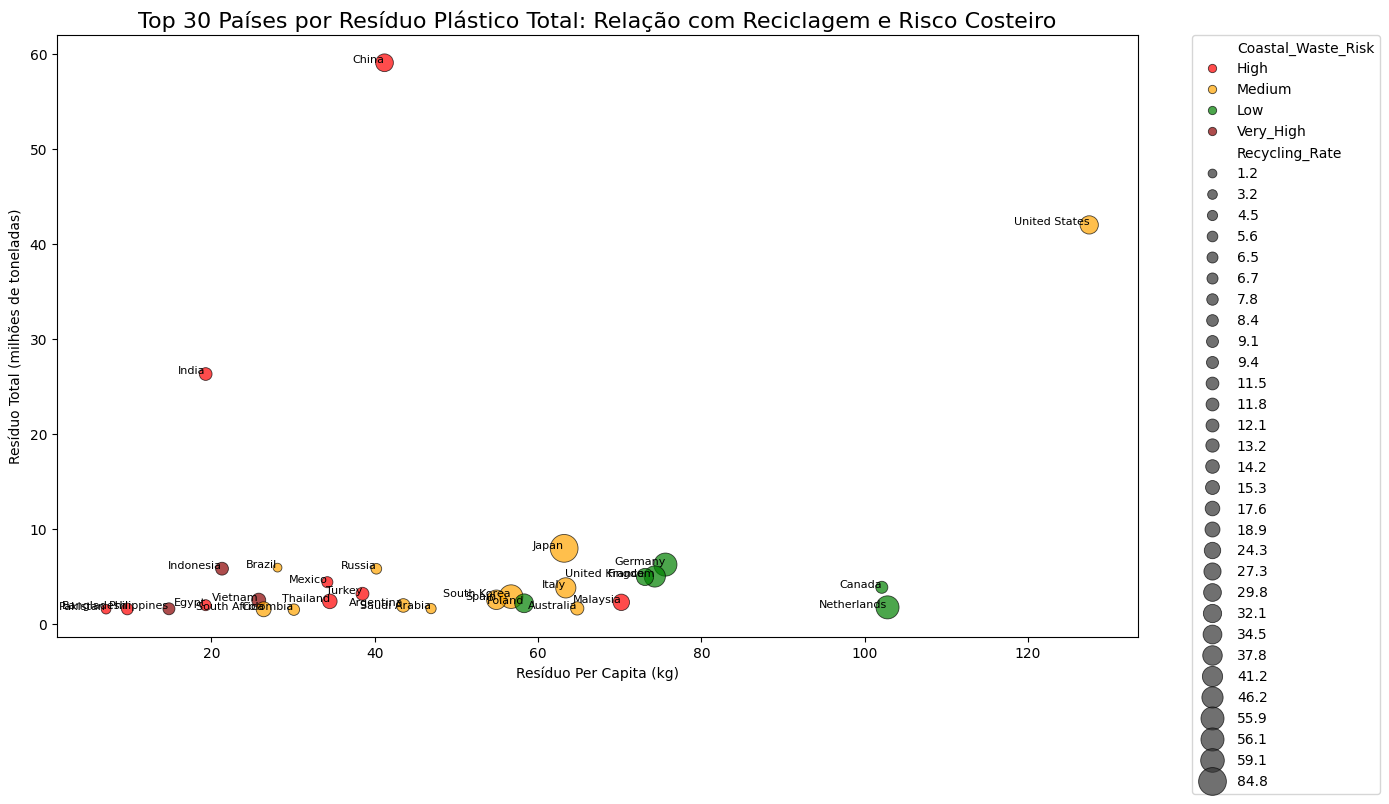

In [ ]:
# Selecionar os 30 países com maior produção total de resíduos plásticos
top30 = df.sort_values(by="Total_Plastic_Waste_MT", ascending=False).head(30)

# Paleta de cores para risco costeiro
risk_palette = {
    "Low": "green",
    "Medium": "orange",
    "High": "red",
    "Very_High": "darkred"
}

# Criar o gráfico
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=top30,
    x="Per_Capita_Waste_KG",
    y="Total_Plastic_Waste_MT",
    hue="Coastal_Waste_Risk",
    size="Recycling_Rate",
    sizes=(40, 400),
    palette=risk_palette,
    alpha=0.7,
    edgecolor="black",
    legend="full"
)

# Adicionar os nomes dos países
for i in range(len(top30)):
    plt.text(
        top30["Per_Capita_Waste_KG"].iloc[i],
        top30["Total_Plastic_Waste_MT"].iloc[i],
        top30["Country"].iloc[i],
        fontsize=8,
        ha='right'
    )

# Títulos e ajustes
plt.title("Top 30 Países por Resíduo Plástico Total: Relação com Reciclagem e Risco Costeiro", fontsize=16)
plt.xlabel("Resíduo Per Capita (kg)")
plt.ylabel("Resíduo Total (milhões de toneladas)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


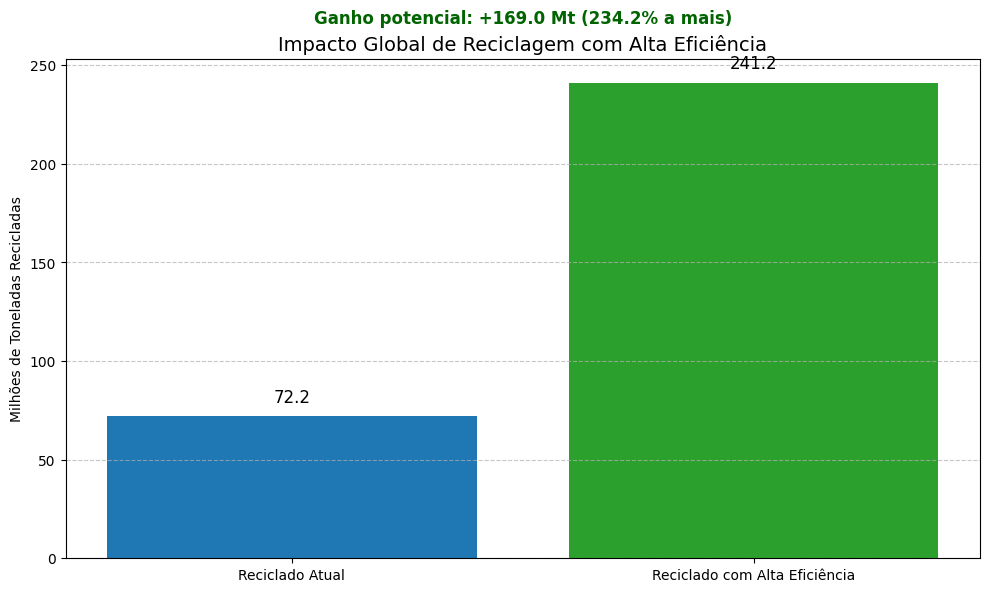

In [ ]:
# Encontrar a maior taxa de reciclagem
max_recycling_rate = df["Recycling_Rate"].max()

# Calcular reciclado atualmente e simulado
df["Current_Recycled_MT"] = df["Total_Plastic_Waste_MT"] * (df["Recycling_Rate"] / 100)
df["Simulated_Recycled_MT"] = df["Total_Plastic_Waste_MT"] * (max_recycling_rate / 100)

# Totais globais
total_current_recycled = df["Current_Recycled_MT"].sum()
total_simulated_recycled = df["Simulated_Recycled_MT"].sum()
recycling_gain = total_simulated_recycled - total_current_recycled
percent_gain = (recycling_gain / total_current_recycled) * 100

# Dados para o gráfico
categories = ["Reciclado Atual", "Reciclado com Alta Eficiência"]
values = [total_current_recycled, total_simulated_recycled]

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=["#1f77b4", "#2ca02c"])
plt.title("Impacto Global de Reciclagem com Alta Eficiência", fontsize=14)
plt.ylabel("Milhões de Toneladas Recicladas")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores numéricos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

# Adicionar legenda extra com economia percentual
plt.text(0.5, max(values) + 30,
         f"Ganho potencial: +{recycling_gain:.1f} Mt ({percent_gain:.1f}% a mais)",
         ha='center', fontsize=12, fontweight='bold', color='darkgreen')

plt.tight_layout()
plt.show()



### Conclusões Individuais
##### Bruno Antico Galin (RA 10417318): Com o modelo de árvore de decisão, cheguei a conclusão de que a taxa de reciclagem é a coluna mais importante do dataset, países com baixa reciclagem e alta geração de lixo por capita também tendem a ter alto risco costal. Porém, mesmo países com baixo volume de lixo tendem a ter esse risco elevado, ressaltando que uma gestão de resíduos é mais importante do que o volume.

##### Caio Teixeira Torres (RA 10417478): A partir dos dados sobre a produção de resíduos plásticos nos principais países, das fontes predominantes desses resíduos e da correlação entre a produção de resíduos per capita e a taxa de reciclagem, várias conclusões interessantes podem ser feitas. Em especial, a análise da correlação entre esses fatores. Países como Cingapura, apesar de gerarem grandes volumes de lixo, possuem uma taxa de reciclagem muito boa, reciclando uma grande parte dos resíduos. O Japão é um excelente exemplo, com uma taxa de reciclagem de 85%. Por outro lado, países que geram menos resíduos plásticos, como Somália e Libéria, também enfrentam grandes desafios na reciclagem, frequentemente devido à falta de infraestrutura e tecnologias adequadas. Isso destaca a necessidade urgente de reduzir a quantidade de resíduos produzidos e, ao mesmo tempo, aumentar a capacidade de reciclagem. Essa mudança não só ajudaria na gestão dos resíduos, mas também reduziria o risco costeiro, como foi apontado na análise do Bruno.

Rodrigo Roveratti Guerrero (RA: 10417090): A partir do gráfico Top 30 Países por Resíduo Plástico Total: Relação com Reciclagem e Risco Costeiro, pude inferir algumas observações:
A primeira foi a alta produção e elevado risco ambiental. Países como China e EUA, combinam altos volumes totais de resíduos com um risco costeiro elevado, o que sugere sérias ameaças aos ecossistemas marinhos se não houver políticas de controle e destinação correta. Outro ponto que pude observar foi o consumo per capita elevado, de países como Austrália e Canadá. Isso indica um padrão de consumo individual elevado, o que pode ser reflexo de estilos de vida altamente industrializados e de consumo. Por fim, analisando o gráfico, temos o risco costeiro como alerta ambiental. A coloração dos pontos evidencia o nível de risco de poluição costeira. Países com a cor vermelha escura (Very_High) estão em situação crítica, muitas vezes combinando baixa reciclagem com alto descarte próximo a zonas costeiras — o que aumenta a possibilidade de lixo marinho e impactos nos oceanos.

Renan Garrido (RA: 10417093): A análise realizada simulou um cenário em que todos os países do mundo reciclassem resíduos plásticos com a mesma eficiência do país mais eficaz presente no conjunto de dados. A partir dos dados disponíveis, observou-se que a taxa máxima de reciclagem nacional é significativamente superior à média global atual.
Ao aplicar essa taxa máxima a todos os países, o total global de plástico reciclado aumentaria de aproximadamente 72.2 milhões de toneladas para 241.2 milhões de toneladas. Isso representaria um ganho adicional de 169 milhões de toneladas, equivalente a um aumento de 234% na quantidade de resíduos plásticos reciclados globalmente.